In [0]:
import zipfile
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/11%20by%2011/model1st11by11.zip"\
    -O "/tmp/model.zip"

zipFile = '/tmp/model.zip'
zip_ref   = zipfile.ZipFile(zipFile, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-11 10:41:28--  https://storage.googleapis.com/datsets/model1/11%20by%2011/model1st11by11.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4171114 (4.0M) [application/x-zip-compressed]
Saving to: ‘/tmp/model.zip’

/tmp/model.zip      100%[===================>]   3.98M  --.-KB/s    in 0.03s   

2020-04-11 10:41:29 (135 MB/s) - ‘/tmp/model.zip’ saved [4171114/4171114]



In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/DRIVE.zip"\
    -O "/tmp/DRIVE.zip"

local_zip = '/tmp/DRIVE.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-11 10:41:51--  https://storage.googleapis.com/datsets/DRIVE.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29756930 (28M) [application/x-zip-compressed]
Saving to: ‘/tmp/DRIVE.zip’

/tmp/DRIVE.zip      100%[===================>]  28.38M   116MB/s    in 0.2s    

2020-04-11 10:41:52 (116 MB/s) - ‘/tmp/DRIVE.zip’ saved [29756930/29756930]



In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
model=tf.keras.models.load_model('/tmp/model1st11by11.hdf5')

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 9, 9, 32)          896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 1,051,521
Trainable params: 1,051,521
Non-trainable params: 0
____________________________________________

In [0]:
import subprocess,sys
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/11%20by%2011/patches11n11test.zip"\
    -O "/tmp/patchestest.zip"

zipFile = '/tmp/patchestest.zip'
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])


--2020-04-11 10:42:14--  https://storage.googleapis.com/datsets/model1/11%20by%2011/patches11n11test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 2607:f8b0:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25793405 (25M) [application/x-zip-compressed]
Saving to: ‘/tmp/patchestest.zip’

/tmp/patchestest.zi 100%[===================>]  24.60M  73.4MB/s    in 0.3s    

2020-04-11 10:42:14 (73.4 MB/s) - ‘/tmp/patchestest.zip’ saved [25793405/25793405]



In [0]:
import numpy
test= numpy.load('/tmp/patches11n11test.npy')
test.shape

(659920, 11, 11, 3)

In [0]:
predict=model.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
predict.shape

(659920, 1)

In [0]:
img1=predict[:329960]*255
img_plot=numpy.reshape(img1,(584,565)).astype('uint8')
img_plot.shape

(584, 565)

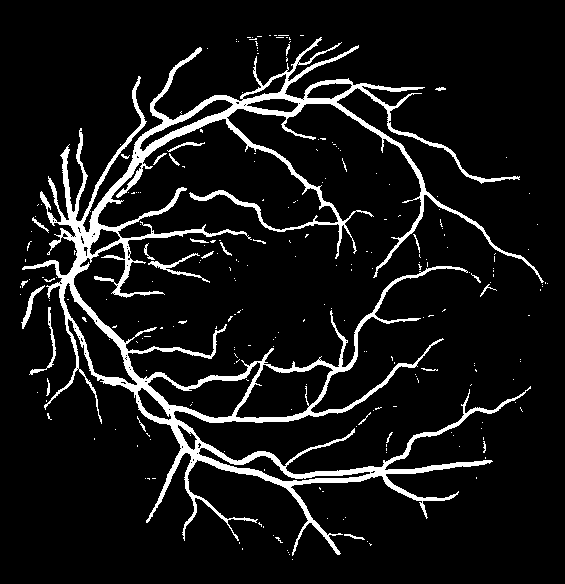

In [0]:
from PIL import Image
img = Image.fromarray(img_plot)
man1=Image.open('/tmp/DRIVE/test/1st_manual/01_manual1.gif')
man2=Image.open('/tmp/DRIVE/test/2nd_manual/01_manual2.gif')
img.save('/content/prediction1.jpg')
img
# man1
# man2
# img.save('1.jpg')

In [0]:
img2=predict[329960:]*255

In [0]:
img2.shape

(329960, 1)

In [0]:
img1_plot=numpy.reshape(img2,(584,565)).astype('uint8')

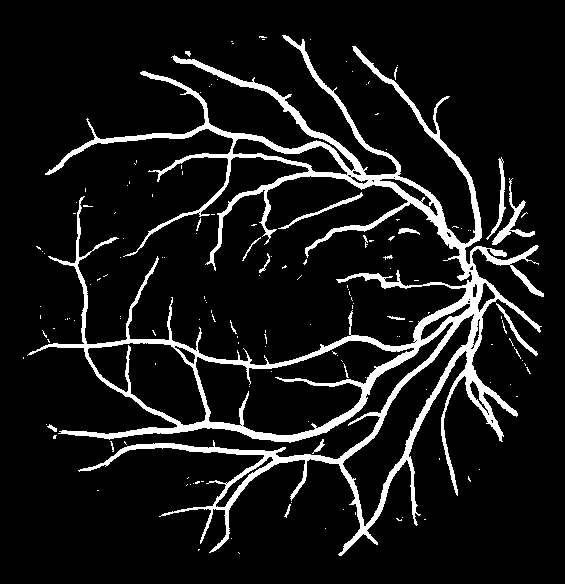

In [0]:
from PIL import Image
img = Image.fromarray(img1_plot)
img

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img1=mpimg.imread('/content/prediction1.jpg')
img2=mpimg.imread('/tmp/DRIVE/test/1st_manual/01_manual1.gif')
img3=mpimg.imread('/tmp/DRIVE/test/2nd_manual/01_manual2.gif')
fig, ax = plt.subplots(2,2)
ax[0][0].imshow(img1);
ax[0][1].imshow(img2);
ax[1][0].imshow(img3)

NameError: ignored